In [1]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import joblib
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer

In [2]:
!pip install tensorflow
 

In [3]:
df = pd.read_csv('customer_churn_dataset-testing-master.csv')
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [4]:
df.shape #number of rows and columns in the DataFrame.

(64374, 12)

In [5]:
df['Churn'].replace({0:'No',1 : 'Yes'}, inplace=True) #replacing 0 with No and 1 with Yes in the Churn column.

C:\Users\ROG Zephyrus G15\AppData\Local\Temp\ipykernel_27352\1496509060.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Churn'].replace({0:'No',1 : 'Yes'}, inplace=True) #replacing 0 with No and 1 with Yes in the Churn column.


In [6]:
df #displaying the DataFrame.

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,Yes
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,No
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,No
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,No
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,No
...,...,...,...,...,...,...,...,...,...,...,...,...
64369,64370,45,Female,33,12,6,21,Basic,Quarterly,947,14,Yes
64370,64371,37,Male,6,1,5,22,Standard,Annual,923,9,Yes
64371,64372,25,Male,39,14,8,30,Premium,Monthly,327,20,Yes
64372,64373,50,Female,18,19,7,22,Standard,Monthly,540,13,Yes


In [7]:
df.info() #displaying the information about the DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         64374 non-null  int64 
 1   Age                64374 non-null  int64 
 2   Gender             64374 non-null  object
 3   Tenure             64374 non-null  int64 
 4   Usage Frequency    64374 non-null  int64 
 5   Support Calls      64374 non-null  int64 
 6   Payment Delay      64374 non-null  int64 
 7   Subscription Type  64374 non-null  object
 8   Contract Length    64374 non-null  object
 9   Total Spend        64374 non-null  int64 
 10  Last Interaction   64374 non-null  int64 
 11  Churn              64374 non-null  object
dtypes: int64(8), object(4)
memory usage: 5.9+ MB


In [8]:
df.duplicated().sum() #checking for the number of duplicate rows in the DataFrame.

0

In [9]:
df.isnull().sum() #checking for the number of missing values in the DataFrame.

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [10]:
df.columns #displaying the columns in the DataFrame.

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')

In [11]:
df.describe() #displaying the summary statistics of the DataFrame.
 

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction
count,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000
mean,32187.500000,41.970982,31.994827,15.080234,5.400690,17.133952,541.023379,15.498850
std,18583.317451,13.924911,17.098234,8.816470,3.114005,8.852211,260.874809,8.638436
min,1.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000
25%,16094.250000,30.000000,18.000000,7.000000,3.000000,10.000000,313.000000,8.000000
50%,32187.500000,42.000000,33.000000,15.000000,6.000000,19.000000,534.000000,15.000000
75%,48280.750000,54.000000,47.000000,23.000000,8.000000,25.000000,768.000000,23.000000
max,64374.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000


In [12]:
# check the unique values in each variable

for i in df.columns:
    print('No. of unique values in', i, 'are:', df[i].nunique())

No. of unique values in CustomerID are: 64374
No. of unique values in Age are: 48
No. of unique values in Gender are: 2
No. of unique values in Tenure are: 60
No. of unique values in Usage Frequency are: 30
No. of unique values in Support Calls are: 11
No. of unique values in Payment Delay are: 31
No. of unique values in Subscription Type are: 3
No. of unique values in Contract Length are: 3
No. of unique values in Total Spend are: 901
No. of unique values in Last Interaction are: 30
No. of unique values in Churn are: 2


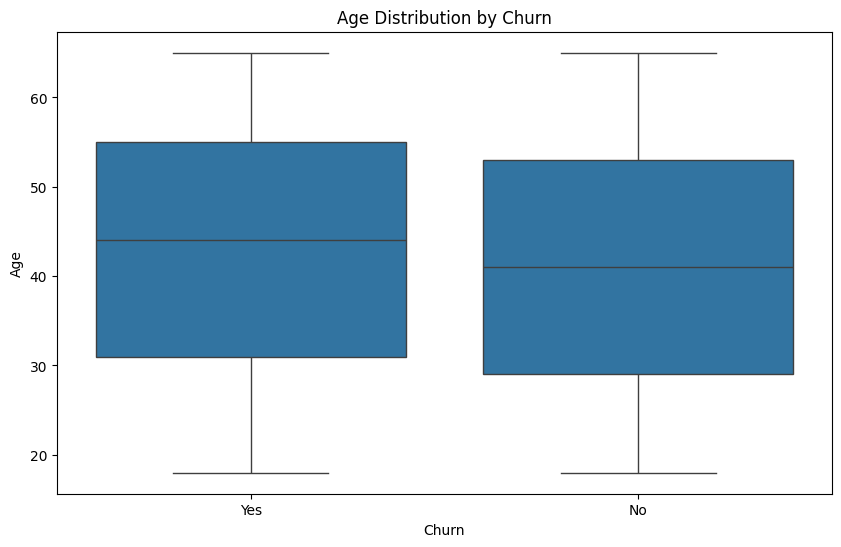

In [13]:

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='Age', data=df)
plt.xlabel('Churn')
plt.ylabel('Age')
plt.title('Age Distribution by Churn')
plt.show()

#A boxplot compares the Age distribution between churned and non-churned customers

In [14]:
!pip install seaborn


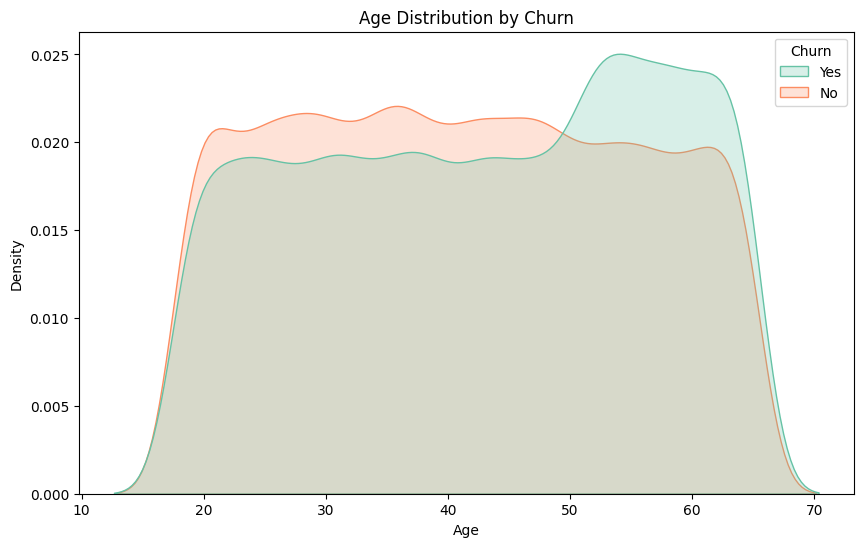

In [15]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Age', hue='Churn', common_norm=False, fill=True, palette='Set2')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age Distribution by Churn')
plt.show()
#The **KDE plot** shows the smooth **Age** distribution for churned vs. non-churned customers, helping to compare their density patterns.
# 1 churned customers or 0 non-churned customers

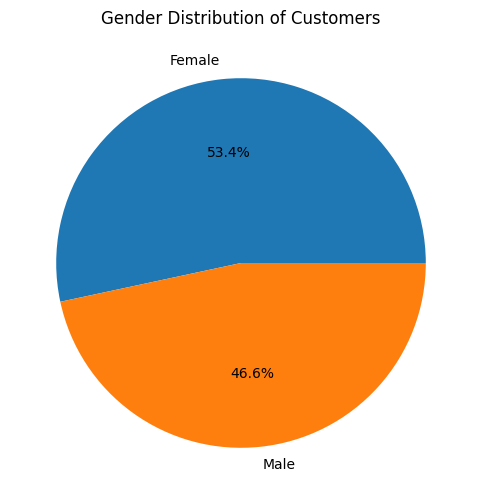

In [16]:

plt.figure(figsize=(6, 6))
gender_counts = df['Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Gender Distribution of Customers')
plt.show()

#represents the percentage of churned and non-churned customers, showing that the dataset is balanced

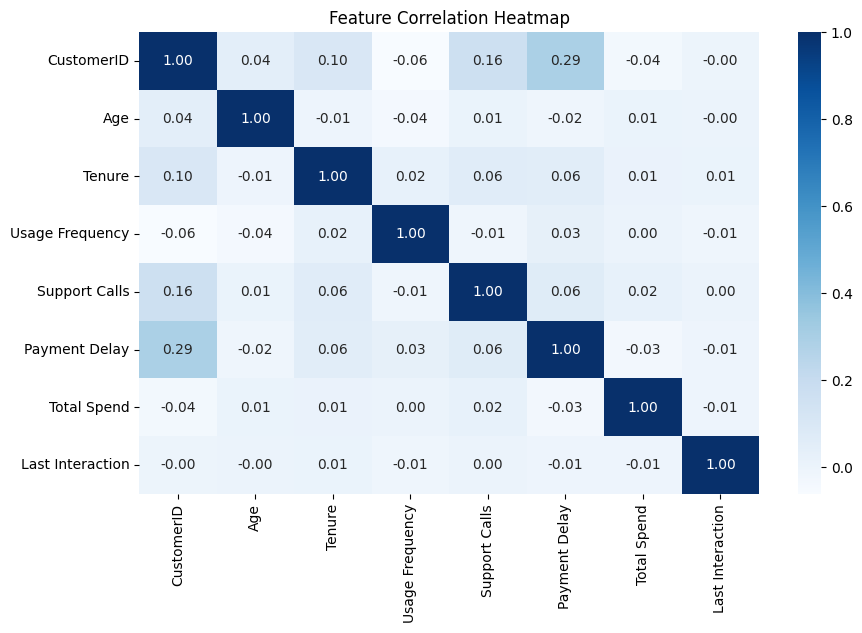

In [17]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='Blues', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

# 1 strong positive
# -1 strong negative
# 0 no correlation or on relationship between the features

In [18]:
# Identify numerical and categorical columns
numerical = []
categorical = []
columns_to_drop = ['CustomerID', 'Gender']
target = 'Churn'

for column in df.columns:
    if column == target or column in columns_to_drop:
        continue
    if df[column].dtype != 'O': 
        numerical.append(column)
    else:
        categorical.append(column)

In [19]:
# Drop unnecessary columns
def drop_column(x):
    return x.drop(columns=columns_to_drop)

In [20]:
categorical 

['Subscription Type', 'Contract Length']

In [21]:
numerical

['Age',
 'Tenure',
 'Usage Frequency',
 'Support Calls',
 'Payment Delay',
 'Total Spend',
 'Last Interaction']

In [22]:
# df[categorical].describe()

In [23]:
# df[numerical].describe()

In [25]:
#transforming the categorical columns into numerical columns using OneHotEncoder.
OneHotEncoder().fit_transform(df[categorical])

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 128748 stored elements and shape (64374, 6)>

In [26]:
from sklearn.preprocessing import OrdinalEncoder
#transforming the categorical columns into numerical columns using OrdinalEncoder.
OrdinalEncoder().fit_transform(df[categorical])

array([[0., 1.],
       [2., 1.],
       [1., 0.],
       ...,
       [1., 1.],
       [2., 1.],
       [2., 1.]])

In [27]:
# Transformers for numerical and categorical features
numerical_transformer = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('scaling', StandardScaler())
])

categorical_transformer = Pipeline([
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('encoding', OneHotEncoder())
])

In [28]:
# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ('numerical', numerical_transformer, numerical),
    ('categorical', categorical_transformer, categorical)
])

pipeline = Pipeline([
    ('drop', FunctionTransformer(drop_column)),
    ('prepro', preprocessor)
])

In [29]:
# Fit and transform the data
preprocessor.fit_transform(df)


array([[-1.43420211, -0.40909964, -0.12252553, ...,  0.        ,
         1.        ,  0.        ],
       [-0.0697304 , -0.23364156,  1.46542392, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.36115541, -0.29212759, -0.57622537, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-1.21875921,  0.40970473, -0.12252553, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.57659831, -0.81850183,  0.44459927, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.72022691,  0.76062088, -0.00910057, ...,  0.        ,
         1.        ,  0.        ]])

In [30]:
# Training pipelines for different models
training_pipeline_Forest = Pipeline([
    ('drop_columns', FunctionTransformer(drop_column)),
    ('preprocessing', preprocessor),
    ('model', RandomForestClassifier())
])

training_pipeline_Logic = Pipeline([
    ('drop_columns', FunctionTransformer(drop_column)),
    ('preprocessing', preprocessor),
    ('model', LogisticRegression())
])

training_pipeline_SVM = Pipeline([
    ('drop_columns', FunctionTransformer(drop_column)),
    ('preprocessing', preprocessor),
    ('model', SVC())
])

training_pipeline_DecisionTree = Pipeline([
    ('drop_columns', FunctionTransformer(drop_column)),
    ('preprocessing', preprocessor),
    ('model', DecisionTreeClassifier())
])

In [31]:
# Split the data into training and testing sets
x, y = df.drop(columns=target), df[target]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# Model training
training_pipeline_DecisionTree.fit(x_train, y_train)
training_pipeline_Forest.fit(x_train, y_train)
training_pipeline_Logic.fit(x_train, y_train)
training_pipeline_SVM.fit(x_train, y_train)

,steps,"[('drop_columns', ...), ('preprocessing', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,func,<function dro...00269735854E0>
,inverse_func,None
,validate,False
,accept_sparse,False
,check_inverse,True
,feature_names_out,None
,kw_args,None


In [ ]:
# Predictions
y_predictionTree = training_pipeline_DecisionTree.predict(x_test)
y_predictionLogic = training_pipeline_Logic.predict(x_test)
y_predictionSVM = training_pipeline_SVM.predict(x_test)
y_predictionForest = training_pipeline_Forest.predict(x_test)

In [ ]:
# Save the models
cmforest = confusion_matrix(y_test,y_predictionTree)
cmlogic = confusion_matrix(y_test,y_predictionLogic)
cmtree = confusion_matrix(y_test,y_predictionSVM)
cmSvm = confusion_matrix(y_test,y_predictionForest)

In [ ]:
# Save the models
cmforest

array([[6379,  414],
       [ 482, 5600]], dtype=int64)

In [ ]:

cmlogic

array([[5590, 1203],
       [1086, 4996]], dtype=int64)

In [ ]:
cmtree 

array([[5947,  846],
       [ 370, 5712]], dtype=int64)

In [ ]:
cmSvm

array([[6228,  565],
       [  51, 6031]], dtype=int64)

In [ ]:
import joblib 
joblib.dump(Pipeline, 'preprocessor_airline.pkl')

['preprocessor_airline.pkl']

In [ ]:
# Convert target labels to numeric if necessary
y_train = y_train.replace({'No': 0, 'Yes': 1})
y_test = y_test.replace({'No': 0, 'Yes': 1})

C:\Users\ROG Zephyrus G15\AppData\Local\Temp\ipykernel_20924\1904184130.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_train = y_train.replace({'No': 0, 'Yes': 1})
C:\Users\ROG Zephyrus G15\AppData\Local\Temp\ipykernel_20924\1904184130.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_test = y_test.replace({'No': 0, 'Yes': 1})


In [ ]:
# Ensure x_train and x_test are arrays after preprocessing
x_train_transformed = preprocessor.fit_transform(x_train)
x_test_transformed = preprocessor.transform(x_test)


In [ ]:

# Input shape fix
input_shape = x_train_transformed.shape[1]

In [ ]:
input_shape #number of columns in the x_train_transformed array.

13

In [ ]:
# Updated neural network model
model = Sequential([
    InputLayer(input_shape=(input_shape,)),
    Dense(512, activation="relu"),
    Dense(256, activation="relu"),
    Dense(128, activation="relu"),
    Dense(64, activation="relu"),
    Dense(32, activation="relu"),
    Dense(8, activation="relu"),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])


In [ ]:

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train_transformed, y_train, epochs=50, validation_data=(x_test_transformed, y_test))

Epoch 1/50
1610/1610 [==============================] - 4s 2ms/step - loss: 0.0829 - accuracy: 0.9595 - val_loss: 0.1397 - val_accuracy: 0.9442
Epoch 2/50
1610/1610 [==============================] - 3s 2ms/step - loss: 0.0817 - accuracy: 0.9603 - val_loss: 0.1358 - val_accuracy: 0.9443
Epoch 3/50
1610/1610 [==============================] - 3s 2ms/step - loss: 0.0800 - accuracy: 0.9610 - val_loss: 0.1522 - val_accuracy: 0.9426
Epoch 4/50
1610/1610 [==============================] - 3s 2ms/step - loss: 0.0810 - accuracy: 0.9607 - val_loss: 0.1406 - val_accuracy: 0.9456
Epoch 5/50
1610/1610 [==============================] - 3s 2ms/step - loss: 0.0787 - accuracy: 0.9618 - val_loss: 0.1463 - val_accuracy: 0.9409
Epoch 6/50
1610/1610 [==============================] - 3s 2ms/step - loss: 0.0782 - accuracy: 0.9618 - val_loss: 0.1430 - val_accuracy: 0.9385
Epoch 7/50
1610/1610 [==============================] - 3s 2ms/step - loss: 0.0748 - accuracy: 0.9631 - val_loss: 0.1592 - val_accuracy:

In [ ]:
x_train_transformed #displaying the x_train_transformed array.

array([[ 1.00748863,  0.58691645, -0.46172589, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.86400944,  1.63912853, -1.14230525, ...,  0.        ,
         0.        ,  1.        ],
       [-0.78600122, -1.16677034, -1.48259492, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.64252203,  0.87919758, -0.68858568, ...,  0.        ,
         0.        ,  1.        ],
       [-1.28817837,  1.46375985,  0.44571325, ...,  1.        ,
         0.        ,  0.        ],
       [-0.64252203,  0.11926664,  0.44571325, ...,  0.        ,
         0.        ,  1.        ]])

In [ ]:
model.save('model.keras') #saving the model.

In [ ]:
x_test_transformed.shape 

(12875, 13)

In [ ]:
x_test_transformed #displaying the x_test_transformed array.

array([[ 0.93574903, -0.69912053,  1.01286271, ...,  0.        ,
         1.        ,  0.        ],
       [-1.00122   , -0.28992695,  1.69344206, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.65314497,  1.63912853,  0.21885346, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.72053025,  1.05456626, -0.91544546, ...,  0.        ,
         0.        ,  1.        ],
       [-1.57513675,  1.40530362,  1.1262926 , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.2183531 ,  0.93765381,  0.67257303, ...,  0.        ,
         1.        ,  0.        ]])

In [ ]:
model.predict(x_test_transformed)

# Load the model


403/403 [==============================] - 0s 833us/step


array([[0.000000e+00],
       [0.000000e+00],
       [1.000000e+00],
       ...,
       [1.000000e+00],
       [2.759212e-07],
       [3.397357e-11]], dtype=float32)

In [ ]:
# Make predictions on the test data
y_pred = model.predict(x_test_transformed)

# Convert the probabilities to binary class predictions (0 or 1)
y_pred_class = (y_pred > 0.5).astype(int)  # Assuming binary classification with a threshold of 0.5

# Now you can generate and display the confusion matrix

cm = confusion_matrix(y_test, y_pred_class)

print(cm)

403/403 [==============================] - 0s 809us/step
[[6348  445]
 [ 467 5615]]


In [ ]:
y_test 

15476    0
34666    0
50474    1
7984     0
20227    0
        ..
15815    0
23037    0
55566    1
22749    0
31651    0
Name: Churn, Length: 12875, dtype: int64

In [ ]:
y_pred[:, 0] > 0.5

array([False, False,  True, ...,  True, False, False])

In [ ]:
y_pred

array([[0.000000e+00],
       [0.000000e+00],
       [1.000000e+00],
       ...,
       [1.000000e+00],
       [2.759212e-07],
       [3.397357e-11]], dtype=float32)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,y_pred_class))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      6793
           1       0.93      0.92      0.92      6082

    accuracy                           0.93     12875
   macro avg       0.93      0.93      0.93     12875
weighted avg       0.93      0.93      0.93     12875



In [ ]:
loss, accuracy = model.evaluate(x_test_transformed, y_test)

403/403 [==============================] - 0s 819us/step - loss: 0.2749 - accuracy: 0.9292


In [ ]:
loss

0.274852991104126

In [ ]:
accuracy

0.9291650652885437

In [ ]:
df

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,Yes
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,No
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,No
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,No
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,No
...,...,...,...,...,...,...,...,...,...,...,...,...
64369,64370,45,Female,33,12,6,21,Basic,Quarterly,947,14,Yes
64370,64371,37,Male,6,1,5,22,Standard,Annual,923,9,Yes
64371,64372,25,Male,39,14,8,30,Premium,Monthly,327,20,Yes
64372,64373,50,Female,18,19,7,22,Standard,Monthly,540,13,Yes


In [ ]:
df.iloc[:, [8]]

,Contract Length
0,Monthly
1,Monthly
2,Annual
3,Quarterly
4,Annual
...,...
64369,Quarterly
64370,Annual
64371,Monthly
64372,Monthly
